In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Sequential, Model

%matplotlib inline

In [2]:
tf.random.set_seed(1)

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
boston_dataset = load_boston()
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [5]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['target'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
X = boston.drop(['target'], axis=1)
y = boston['target']

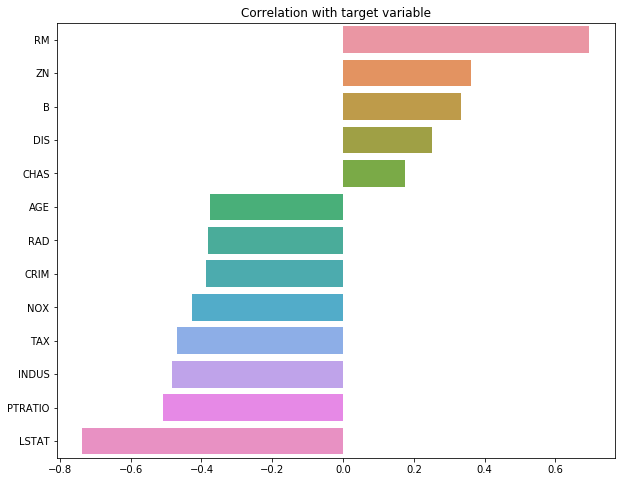

In [9]:
corr_with_target = boston.corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

In [10]:
# Масштабирование
X_sc = StandardScaler().fit(X).transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size = 0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [12]:
results = pd.DataFrame() # сводная таблица результатов
n_layers = [] # число слоев
n_nums = [] # число нейронов
act_func = [] # функция активации
opt = [] # оптимизатор
train_mse = [] # ошибка на тренировочной выборке
test_mse = [] # ошибка на тестовой выборке


Параметры текущей нейронной сети: 3 слоя, 32 нейронов, функция активации relu, оптимизатор RMSprop...
12/12 - 0s - loss: 38.1753 - mse: 38.1753
5/5 - 0s - loss: 52.0524 - mse: 52.0524

Параметры текущей нейронной сети: 3 слоя, 32 нейронов, функция активации relu, оптимизатор Adam...
12/12 - 0s - loss: 37.8146 - mse: 37.8146
5/5 - 0s - loss: 52.5413 - mse: 52.5413

Параметры текущей нейронной сети: 3 слоя, 32 нейронов, функция активации elu, оптимизатор RMSprop...


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


12/12 - 0s - loss: 33.3957 - mse: 33.3957
5/5 - 0s - loss: 48.1283 - mse: 48.1283

Параметры текущей нейронной сети: 3 слоя, 32 нейронов, функция активации elu, оптимизатор Adam...
12/12 - 0s - loss: 46.8435 - mse: 46.8435
5/5 - 0s - loss: 63.5296 - mse: 63.5296

Параметры текущей нейронной сети: 3 слоя, 32 нейронов, функция активации sigmoid, оптимизатор RMSprop...


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


12/12 - 0s - loss: 128.4810 - mse: 128.4810
5/5 - 0s - loss: 127.4770 - mse: 127.4770

Параметры текущей нейронной сети: 3 слоя, 32 нейронов, функция активации sigmoid, оптимизатор Adam...
12/12 - 0s - loss: 128.6062 - mse: 128.6062
5/5 - 0s - loss: 129.0575 - mse: 129.0575

Параметры текущей нейронной сети: 3 слоя, 32 нейронов, функция активации tanh, оптимизатор RMSprop...


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


12/12 - 0s - loss: 155.3977 - mse: 155.3977
5/5 - 0s - loss: 173.3057 - mse: 173.3057

Параметры текущей нейронной сети: 3 слоя, 32 нейронов, функция активации tanh, оптимизатор Adam...
12/12 - 0s - loss: 125.6803 - mse: 125.6803
5/5 - 0s - loss: 143.6509 - mse: 143.6509

Параметры текущей нейронной сети: 3 слоя, 64 нейронов, функция активации relu, оптимизатор RMSprop...


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


12/12 - 0s - loss: 21.3991 - mse: 21.3991
5/5 - 0s - loss: 35.1875 - mse: 35.1875

Параметры текущей нейронной сети: 3 слоя, 64 нейронов, функция активации relu, оптимизатор Adam...
12/12 - 0s - loss: 22.8053 - mse: 22.8053
5/5 - 0s - loss: 36.1326 - mse: 36.1326

Параметры текущей нейронной сети: 3 слоя, 64 нейронов, функция активации elu, оптимизатор RMSprop...


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


12/12 - 0s - loss: 21.1735 - mse: 21.1735
5/5 - 0s - loss: 31.6417 - mse: 31.6417

Параметры текущей нейронной сети: 3 слоя, 64 нейронов, функция активации elu, оптимизатор Adam...
12/12 - 0s - loss: 21.8007 - mse: 21.8007
5/5 - 0s - loss: 34.0219 - mse: 34.0219

Параметры текущей нейронной сети: 3 слоя, 64 нейронов, функция активации sigmoid, оптимизатор RMSprop...


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


12/12 - 0s - loss: 32.1905 - mse: 32.1905
5/5 - 0s - loss: 40.9140 - mse: 40.9140

Параметры текущей нейронной сети: 3 слоя, 64 нейронов, функция активации sigmoid, оптимизатор Adam...
12/12 - 0s - loss: 40.3967 - mse: 40.3967
5/5 - 0s - loss: 48.7460 - mse: 48.7460

Параметры текущей нейронной сети: 3 слоя, 64 нейронов, функция активации tanh, оптимизатор RMSprop...


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


12/12 - 0s - loss: 36.3278 - mse: 36.3278
5/5 - 0s - loss: 44.6236 - mse: 44.6236

Параметры текущей нейронной сети: 3 слоя, 64 нейронов, функция активации tanh, оптимизатор Adam...
12/12 - 0s - loss: 39.6543 - mse: 39.6543
5/5 - 0s - loss: 50.2655 - mse: 50.2655

Параметры текущей нейронной сети: 3 слоя, 256 нейронов, функция активации relu, оптимизатор RMSprop...


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


12/12 - 0s - loss: 14.0185 - mse: 14.0185
5/5 - 0s - loss: 24.5416 - mse: 24.5416

Параметры текущей нейронной сети: 3 слоя, 256 нейронов, функция активации relu, оптимизатор Adam...
12/12 - 0s - loss: 16.5005 - mse: 16.5005
5/5 - 0s - loss: 28.3820 - mse: 28.3820

Параметры текущей нейронной сети: 3 слоя, 256 нейронов, функция активации elu, оптимизатор RMSprop...


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


12/12 - 0s - loss: 19.0152 - mse: 19.0152
5/5 - 0s - loss: 26.2088 - mse: 26.2088

Параметры текущей нейронной сети: 3 слоя, 256 нейронов, функция активации elu, оптимизатор Adam...
12/12 - 0s - loss: 17.7105 - mse: 17.7105
5/5 - 0s - loss: 25.9566 - mse: 25.9566

Параметры текущей нейронной сети: 3 слоя, 256 нейронов, функция активации sigmoid, оптимизатор RMSprop...


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


12/12 - 0s - loss: 22.3697 - mse: 22.3697
5/5 - 0s - loss: 30.8609 - mse: 30.8609

Параметры текущей нейронной сети: 3 слоя, 256 нейронов, функция активации sigmoid, оптимизатор Adam...
12/12 - 0s - loss: 24.3142 - mse: 24.3142
5/5 - 0s - loss: 33.3560 - mse: 33.3560

Параметры текущей нейронной сети: 3 слоя, 256 нейронов, функция активации tanh, оптимизатор RMSprop...


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


12/12 - 0s - loss: 23.1326 - mse: 23.1326
5/5 - 0s - loss: 29.0447 - mse: 29.0447

Параметры текущей нейронной сети: 3 слоя, 256 нейронов, функция активации tanh, оптимизатор Adam...
12/12 - 0s - loss: 20.9374 - mse: 20.9374
5/5 - 0s - loss: 28.4755 - mse: 28.4755


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


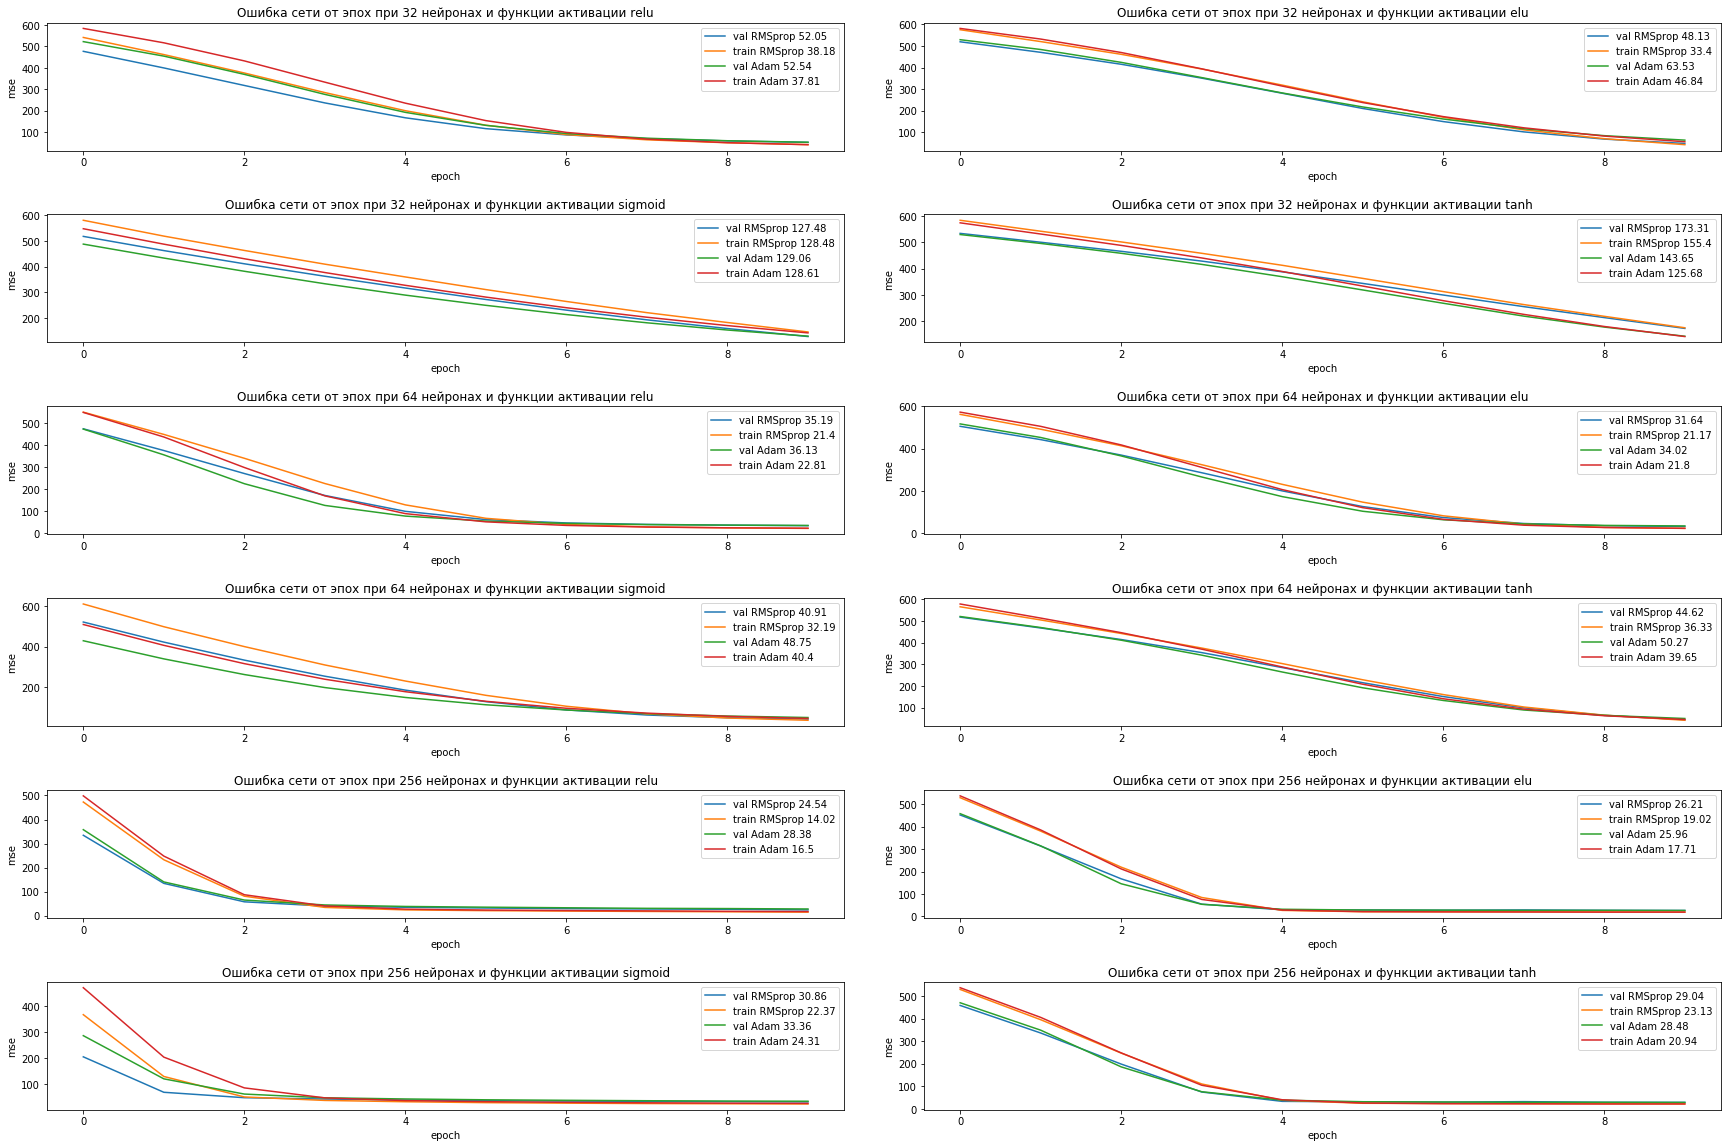

In [13]:
# Рассмотрим 3-слойную сеть
fig = plt.figure(figsize=(30,20))
plt.subplots_adjust(wspace=0.1, hspace=0.5)
k = 0
for n in [32, 64, 256]:
  for f in ['relu', 'elu', 'sigmoid', 'tanh']:
    k += 1
    for o in ['RMSprop', 'Adam']:
      n_layers.append(3)
      n_nums.append(n)
      act_func.append(f)
      opt.append(o)
      
      print(f'\nПараметры текущей нейронной сети: 3 слоя, {n} нейронов, функция активации {f}, оптимизатор {o}...')

      inputs = Input(shape=(13,))
      x_1 = Flatten()(inputs)
      x_2 = Dense(n, activation=f)(x_1)
      outputs = Dense(1)(x_2)

      model = Model(inputs, outputs)

      model.compile(optimizer=o,
                    loss='mse',
                    metrics=['mse'])

      #model.summary()

      history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=5,
                    validation_data=(X_test, y_test), 
                    verbose=0)

      train_loss, train_m = model.evaluate(X_train, y_train, verbose=2)
      test_loss, test_m = model.evaluate(X_test, y_test, verbose=2)
      train_mse.append(train_m)
      test_mse.append(test_m)
      
      ax = fig.add_subplot(6, 2, k)
      ax.plot(history.history['val_mse'], label=f'val {o} {round(test_m,2)}')
      ax.plot(history.history['mse'], label=f'train {o} {round(train_m,2)}')
      ax.legend()
      ax.set_xlabel('epoch')
      ax.set_ylabel('mse')
      ax.set(title = f'Ошибка сети от эпох при {n} нейронах и функции активации {f}')
plt.show()


Параметры текущей нейронной сети: 5 слоёв, 32 нейронов, функция активации relu, оптимизатор RMSprop...
12/12 - 0s - loss: 10.5016 - mse: 10.5016
5/5 - 0s - loss: 20.2007 - mse: 20.2007

Параметры текущей нейронной сети: 5 слоёв, 32 нейронов, функция активации relu, оптимизатор Adam...
12/12 - 0s - loss: 10.7352 - mse: 10.7352
5/5 - 0s - loss: 22.5878 - mse: 22.5878

Параметры текущей нейронной сети: 5 слоёв, 32 нейронов, функция активации elu, оптимизатор RMSprop...


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


12/12 - 0s - loss: 15.4312 - mse: 15.4312
5/5 - 0s - loss: 24.8685 - mse: 24.8685

Параметры текущей нейронной сети: 5 слоёв, 32 нейронов, функция активации elu, оптимизатор Adam...
12/12 - 0s - loss: 13.3722 - mse: 13.3722
5/5 - 0s - loss: 24.4720 - mse: 24.4720

Параметры текущей нейронной сети: 5 слоёв, 32 нейронов, функция активации sigmoid, оптимизатор RMSprop...


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


12/12 - 0s - loss: 88.0997 - mse: 88.0997
5/5 - 0s - loss: 84.3877 - mse: 84.3877

Параметры текущей нейронной сети: 5 слоёв, 32 нейронов, функция активации sigmoid, оптимизатор Adam...
12/12 - 0s - loss: 125.3398 - mse: 125.3398
5/5 - 0s - loss: 115.3075 - mse: 115.3075

Параметры текущей нейронной сети: 5 слоёв, 32 нейронов, функция активации tanh, оптимизатор RMSprop...


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


12/12 - 0s - loss: 57.6156 - mse: 57.6156
5/5 - 0s - loss: 58.0365 - mse: 58.0365

Параметры текущей нейронной сети: 5 слоёв, 32 нейронов, функция активации tanh, оптимизатор Adam...
12/12 - 0s - loss: 58.6910 - mse: 58.6910
5/5 - 0s - loss: 58.3672 - mse: 58.3672

Параметры текущей нейронной сети: 5 слоёв, 64 нейронов, функция активации relu, оптимизатор RMSprop...


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


12/12 - 0s - loss: 10.7435 - mse: 10.7435
5/5 - 0s - loss: 19.6170 - mse: 19.6170

Параметры текущей нейронной сети: 5 слоёв, 64 нейронов, функция активации relu, оптимизатор Adam...
12/12 - 0s - loss: 8.5056 - mse: 8.5056
5/5 - 0s - loss: 18.2478 - mse: 18.2478

Параметры текущей нейронной сети: 5 слоёв, 64 нейронов, функция активации elu, оптимизатор RMSprop...


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


12/12 - 0s - loss: 13.0558 - mse: 13.0558
5/5 - 0s - loss: 20.0580 - mse: 20.0580

Параметры текущей нейронной сети: 5 слоёв, 64 нейронов, функция активации elu, оптимизатор Adam...
12/12 - 0s - loss: 10.7053 - mse: 10.7053
5/5 - 0s - loss: 19.7662 - mse: 19.7662

Параметры текущей нейронной сети: 5 слоёв, 64 нейронов, функция активации sigmoid, оптимизатор RMSprop...


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


12/12 - 0s - loss: 53.6935 - mse: 53.6935
5/5 - 0s - loss: 58.5191 - mse: 58.5191

Параметры текущей нейронной сети: 5 слоёв, 64 нейронов, функция активации sigmoid, оптимизатор Adam...
12/12 - 0s - loss: 88.0666 - mse: 88.0666
5/5 - 0s - loss: 84.3054 - mse: 84.3054

Параметры текущей нейронной сети: 5 слоёв, 64 нейронов, функция активации tanh, оптимизатор RMSprop...


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


12/12 - 0s - loss: 23.9211 - mse: 23.9211
5/5 - 0s - loss: 29.3700 - mse: 29.3700

Параметры текущей нейронной сети: 5 слоёв, 64 нейронов, функция активации tanh, оптимизатор Adam...
12/12 - 0s - loss: 31.1695 - mse: 31.1695
5/5 - 0s - loss: 35.9240 - mse: 35.9240

Параметры текущей нейронной сети: 5 слоёв, 256 нейронов, функция активации relu, оптимизатор RMSprop...


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


12/12 - 0s - loss: 24.6817 - mse: 24.6817
5/5 - 0s - loss: 26.3979 - mse: 26.3979

Параметры текущей нейронной сети: 5 слоёв, 256 нейронов, функция активации relu, оптимизатор Adam...
12/12 - 0s - loss: 8.7416 - mse: 8.7416
5/5 - 0s - loss: 16.7053 - mse: 16.7053

Параметры текущей нейронной сети: 5 слоёв, 256 нейронов, функция активации elu, оптимизатор RMSprop...


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


12/12 - 0s - loss: 16.1678 - mse: 16.1678
5/5 - 0s - loss: 19.2423 - mse: 19.2423

Параметры текущей нейронной сети: 5 слоёв, 256 нейронов, функция активации elu, оптимизатор Adam...
12/12 - 0s - loss: 12.7001 - mse: 12.7001
5/5 - 0s - loss: 19.4152 - mse: 19.4152

Параметры текущей нейронной сети: 5 слоёв, 256 нейронов, функция активации sigmoid, оптимизатор RMSprop...


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


12/12 - 0s - loss: 31.9478 - mse: 31.9478
5/5 - 0s - loss: 38.6720 - mse: 38.6720

Параметры текущей нейронной сети: 5 слоёв, 256 нейронов, функция активации sigmoid, оптимизатор Adam...
12/12 - 0s - loss: 40.5666 - mse: 40.5666
5/5 - 0s - loss: 46.9458 - mse: 46.9458

Параметры текущей нейронной сети: 5 слоёв, 256 нейронов, функция активации tanh, оптимизатор RMSprop...


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


12/12 - 0s - loss: 10.6813 - mse: 10.6813
5/5 - 0s - loss: 21.4159 - mse: 21.4159

Параметры текущей нейронной сети: 5 слоёв, 256 нейронов, функция активации tanh, оптимизатор Adam...
12/12 - 0s - loss: 10.7300 - mse: 10.7300
5/5 - 0s - loss: 18.5205 - mse: 18.5205


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:42: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


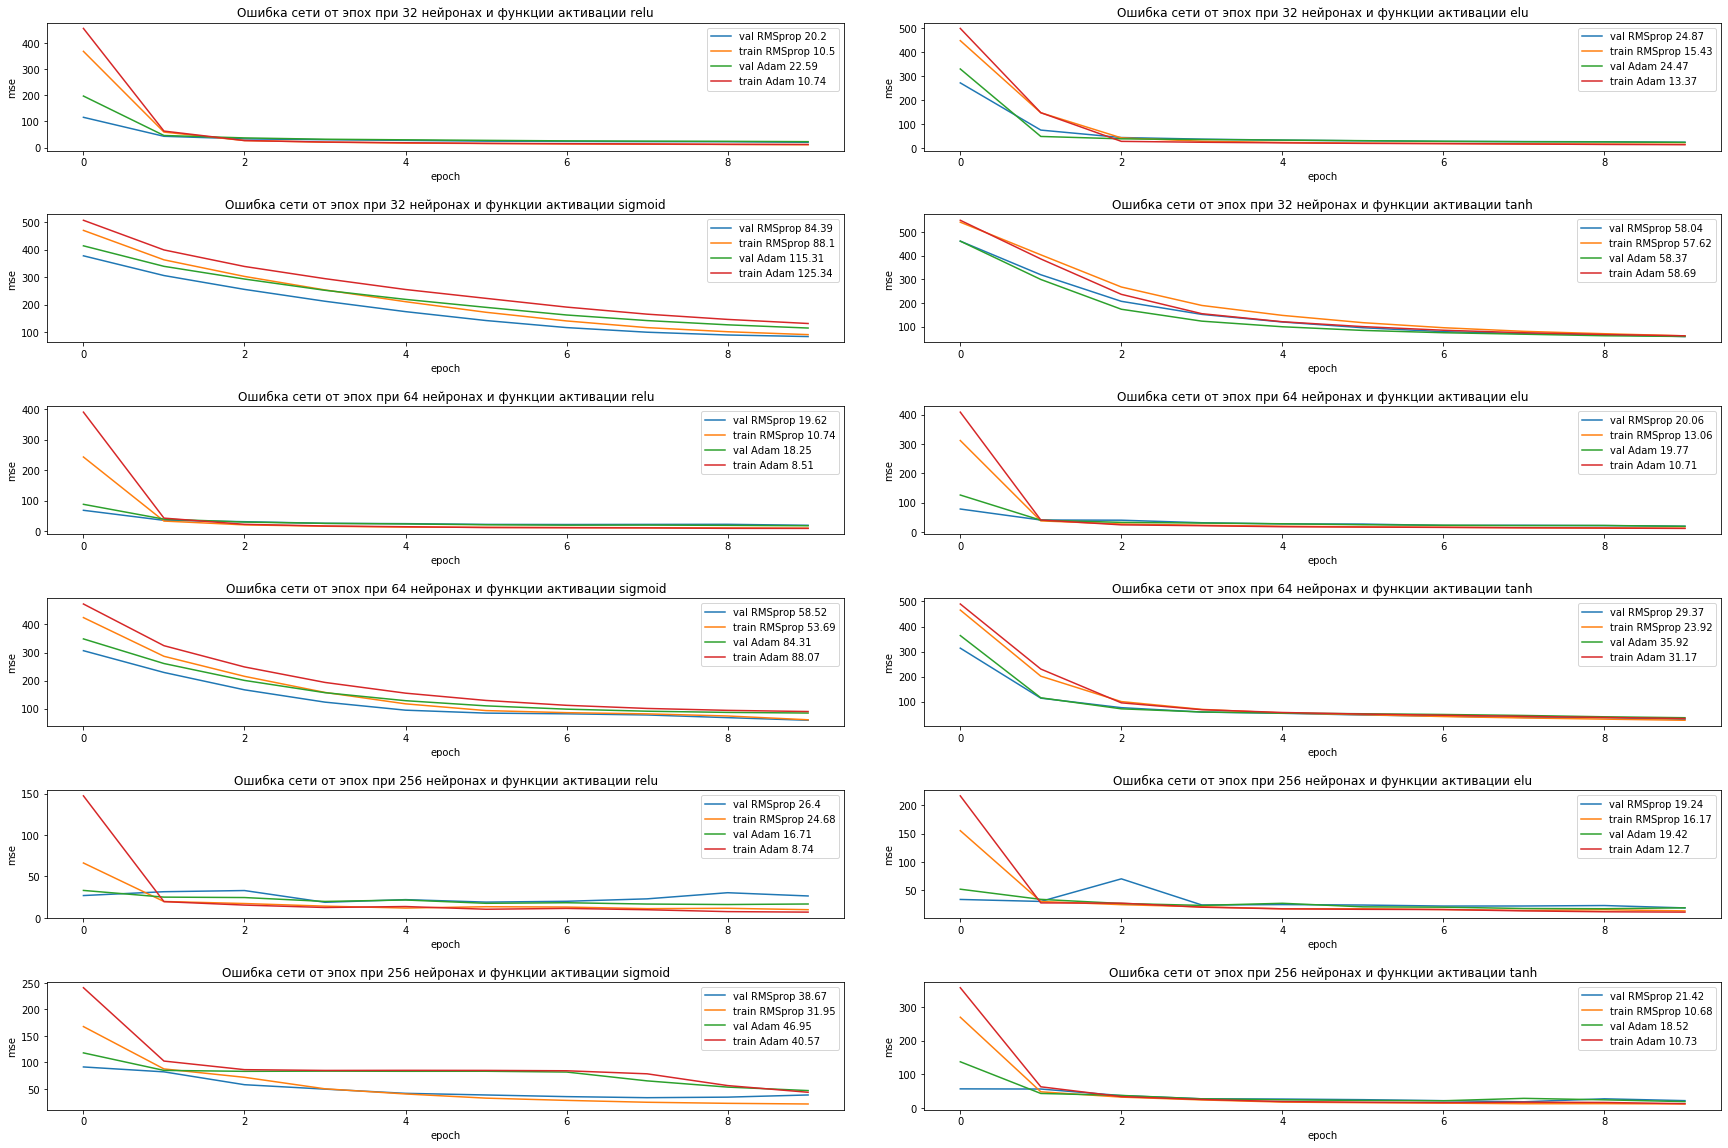

In [14]:
# Рассмотрим 5-слойную сеть
fig = plt.figure(figsize=(30,20))
plt.subplots_adjust(wspace=0.1, hspace=0.5)
k = 0
for n in [32, 64, 256]:
  for f in ['relu', 'elu', 'sigmoid', 'tanh']:
    k += 1
    for o in ['RMSprop', 'Adam']:
      n_layers.append(5)
      n_nums.append(n)
      act_func.append(f)
      opt.append(o)
      
      print(f'\nПараметры текущей нейронной сети: 5 слоёв, {n} нейронов, функция активации {f}, оптимизатор {o}...')

      inputs = Input(shape=(13,))
      x_1 = Flatten()(inputs)
      x_2 = Dense(n, activation=f)(x_1)
      x_3 = Dense(n, activation=f)(x_2)
      x_4 = Dense(n, activation=f)(x_3)
      outputs = Dense(1)(x_4)

      model = Model(inputs, outputs)

      model.compile(optimizer=o,
                    loss='mse',
                    metrics=['mse'])

      #model.summary()

      history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=5,
                    validation_data=(X_test, y_test), 
                    verbose=0)

      train_loss, train_m = model.evaluate(X_train, y_train, verbose=2)
      test_loss, test_m = model.evaluate(X_test, y_test, verbose=2)
      train_mse.append(train_m)
      test_mse.append(test_m)
      
      ax = fig.add_subplot(6, 2, k)
      ax.plot(history.history['val_mse'], label=f'val {o} {round(test_m,2)}')
      ax.plot(history.history['mse'], label=f'train {o} {round(train_m,2)}')
      ax.legend()
      ax.set_xlabel('epoch')
      ax.set_ylabel('mse')
      ax.set(title = f'Ошибка сети от эпох при {n} нейронах и функции активации {f}')
plt.show()


Параметры текущей нейронной сети: 10 слоёв, 32 нейронов, функция активации relu, оптимизатор RMSprop...
12/12 - 0s - loss: 26.1753 - mse: 26.1753
5/5 - 0s - loss: 32.8036 - mse: 32.8036

Параметры текущей нейронной сети: 10 слоёв, 32 нейронов, функция активации relu, оптимизатор Adam...
12/12 - 0s - loss: 8.2806 - mse: 8.2806
5/5 - 0s - loss: 16.0339 - mse: 16.0339

Параметры текущей нейронной сети: 10 слоёв, 32 нейронов, функция активации elu, оптимизатор RMSprop...


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


12/12 - 0s - loss: 13.6062 - mse: 13.6062
5/5 - 0s - loss: 18.6794 - mse: 18.6794

Параметры текущей нейронной сети: 10 слоёв, 32 нейронов, функция активации elu, оптимизатор Adam...
12/12 - 0s - loss: 9.7609 - mse: 9.7609
5/5 - 0s - loss: 16.5008 - mse: 16.5008

Параметры текущей нейронной сети: 10 слоёв, 32 нейронов, функция активации sigmoid, оптимизатор RMSprop...


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


12/12 - 0s - loss: 92.8931 - mse: 92.8931
5/5 - 0s - loss: 87.8583 - mse: 87.8583

Параметры текущей нейронной сети: 10 слоёв, 32 нейронов, функция активации sigmoid, оптимизатор Adam...
12/12 - 0s - loss: 118.8033 - mse: 118.8033
5/5 - 0s - loss: 109.5444 - mse: 109.5444

Параметры текущей нейронной сети: 10 слоёв, 32 нейронов, функция активации tanh, оптимизатор RMSprop...


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


12/12 - 0s - loss: 85.2385 - mse: 85.2385
5/5 - 0s - loss: 83.0356 - mse: 83.0356

Параметры текущей нейронной сети: 10 слоёв, 32 нейронов, функция активации tanh, оптимизатор Adam...
12/12 - 0s - loss: 86.3536 - mse: 86.3536
5/5 - 0s - loss: 83.5490 - mse: 83.5490

Параметры текущей нейронной сети: 10 слоёв, 64 нейронов, функция активации relu, оптимизатор RMSprop...


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


12/12 - 0s - loss: 47.3542 - mse: 47.3542
5/5 - 0s - loss: 46.0110 - mse: 46.0110

Параметры текущей нейронной сети: 10 слоёв, 64 нейронов, функция активации relu, оптимизатор Adam...
12/12 - 0s - loss: 11.2357 - mse: 11.2357
5/5 - 0s - loss: 18.4906 - mse: 18.4906

Параметры текущей нейронной сети: 10 слоёв, 64 нейронов, функция активации elu, оптимизатор RMSprop...


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


12/12 - 0s - loss: 20.2870 - mse: 20.2870
5/5 - 0s - loss: 21.5067 - mse: 21.5067

Параметры текущей нейронной сети: 10 слоёв, 64 нейронов, функция активации elu, оптимизатор Adam...
12/12 - 0s - loss: 11.3513 - mse: 11.3513
5/5 - 0s - loss: 18.0118 - mse: 18.0118

Параметры текущей нейронной сети: 10 слоёв, 64 нейронов, функция активации sigmoid, оптимизатор RMSprop...


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


12/12 - 0s - loss: 84.7793 - mse: 84.7793
5/5 - 0s - loss: 83.6094 - mse: 83.6094

Параметры текущей нейронной сети: 10 слоёв, 64 нейронов, функция активации sigmoid, оптимизатор Adam...
12/12 - 0s - loss: 86.3978 - mse: 86.3978
5/5 - 0s - loss: 83.5904 - mse: 83.5904

Параметры текущей нейронной сети: 10 слоёв, 64 нейронов, функция активации tanh, оптимизатор RMSprop...


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


12/12 - 0s - loss: 26.7394 - mse: 26.7394
5/5 - 0s - loss: 31.9964 - mse: 31.9964

Параметры текущей нейронной сети: 10 слоёв, 64 нейронов, функция активации tanh, оптимизатор Adam...
12/12 - 0s - loss: 80.1751 - mse: 80.1751
5/5 - 0s - loss: 78.8401 - mse: 78.8401

Параметры текущей нейронной сети: 10 слоёв, 256 нейронов, функция активации relu, оптимизатор RMSprop...


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


12/12 - 0s - loss: 187.3122 - mse: 187.3122
5/5 - 0s - loss: 160.0835 - mse: 160.0835

Параметры текущей нейронной сети: 10 слоёв, 256 нейронов, функция активации relu, оптимизатор Adam...
12/12 - 0s - loss: 4.4415 - mse: 4.4415
5/5 - 0s - loss: 13.7856 - mse: 13.7856

Параметры текущей нейронной сети: 10 слоёв, 256 нейронов, функция активации elu, оптимизатор RMSprop...


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


12/12 - 0s - loss: 15.1964 - mse: 15.1964
5/5 - 0s - loss: 24.1944 - mse: 24.1944

Параметры текущей нейронной сети: 10 слоёв, 256 нейронов, функция активации elu, оптимизатор Adam...
12/12 - 0s - loss: 25.6532 - mse: 25.6532
5/5 - 0s - loss: 30.5058 - mse: 30.5058

Параметры текущей нейронной сети: 10 слоёв, 256 нейронов, функция активации sigmoid, оптимизатор RMSprop...


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


12/12 - 0s - loss: 84.7645 - mse: 84.7645
5/5 - 0s - loss: 83.7602 - mse: 83.7602

Параметры текущей нейронной сети: 10 слоёв, 256 нейронов, функция активации sigmoid, оптимизатор Adam...
12/12 - 0s - loss: 84.7787 - mse: 84.7787
5/5 - 0s - loss: 83.9498 - mse: 83.9498

Параметры текущей нейронной сети: 10 слоёв, 256 нейронов, функция активации tanh, оптимизатор RMSprop...


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


12/12 - 0s - loss: 29.6923 - mse: 29.6923
5/5 - 0s - loss: 40.0496 - mse: 40.0496

Параметры текущей нейронной сети: 10 слоёв, 256 нейронов, функция активации tanh, оптимизатор Adam...
12/12 - 0s - loss: 20.3613 - mse: 20.3613
5/5 - 0s - loss: 32.8504 - mse: 32.8504


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:47: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


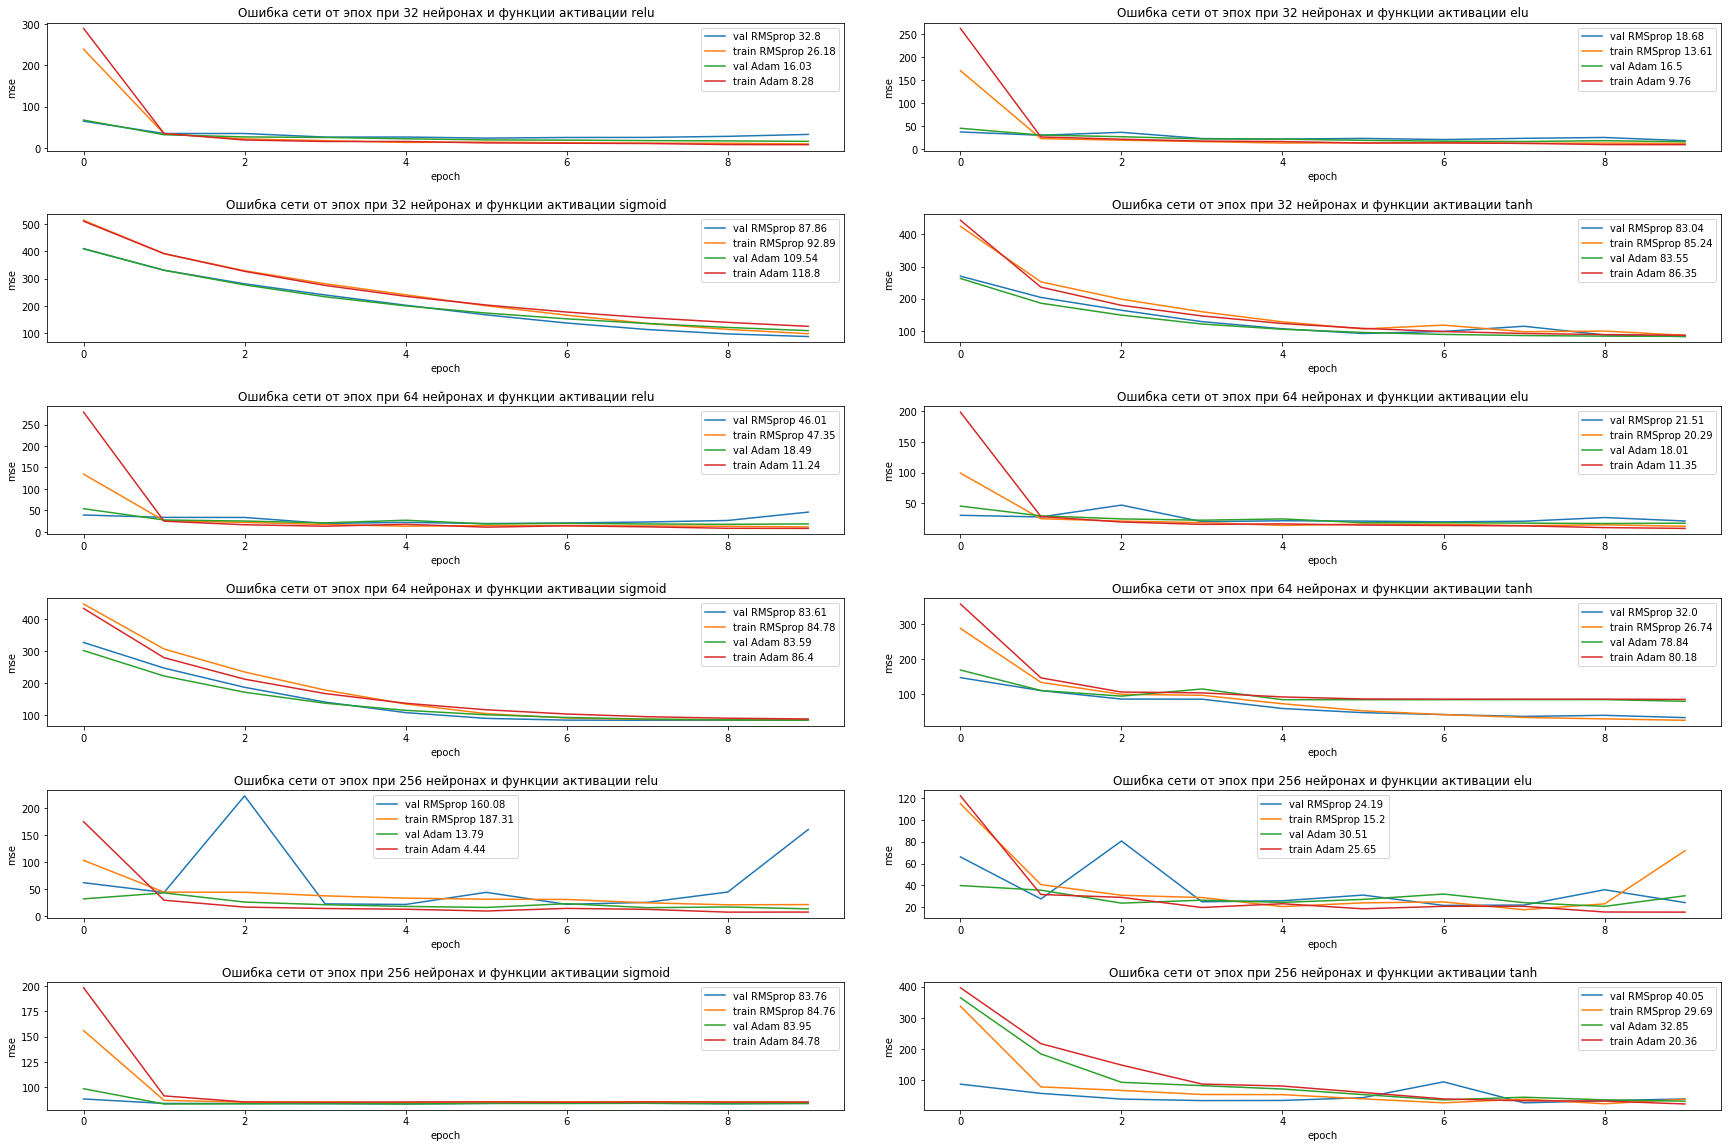

In [15]:
# Рассмотрим 10-слойную сеть
fig = plt.figure(figsize=(30,20))
plt.subplots_adjust(wspace=0.1, hspace=0.5)
k = 0
for n in [32, 64, 256]:
  for f in ['relu', 'elu', 'sigmoid', 'tanh']:
    k += 1
    for o in ['RMSprop', 'Adam']:
      n_layers.append(10)
      n_nums.append(n)
      act_func.append(f)
      opt.append(o)
      
      print(f'\nПараметры текущей нейронной сети: 10 слоёв, {n} нейронов, функция активации {f}, оптимизатор {o}...')

      inputs = Input(shape=(13,))
      x_1 = Flatten()(inputs)
      x_2 = Dense(n, activation=f)(x_1)
      x_3 = Dense(n, activation=f)(x_2)
      x_4 = Dense(n, activation=f)(x_3)
      x_5 = Dense(n, activation=f)(x_4)
      x_6 = Dense(n, activation=f)(x_5)
      x_7 = Dense(n, activation=f)(x_6)
      x_8 = Dense(n, activation=f)(x_7)
      x_9 = Dense(n, activation=f)(x_8)
      outputs = Dense(1)(x_9)

      model = Model(inputs, outputs)

      model.compile(optimizer=o,
                    loss='mse',
                    metrics=['mse'])

      #model.summary()

      history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=5,
                    validation_data=(X_test, y_test), 
                    verbose=0)

      train_loss, train_m = model.evaluate(X_train, y_train, verbose=2)
      test_loss, test_m = model.evaluate(X_test, y_test, verbose=2)
      train_mse.append(train_m)
      test_mse.append(test_m)
      
      ax = fig.add_subplot(6, 2, k)
      ax.plot(history.history['val_mse'], label=f'val {o} {round(test_m,2)}')
      ax.plot(history.history['mse'], label=f'train {o} {round(train_m,2)}')
      ax.legend()
      ax.set_xlabel('epoch')
      ax.set_ylabel('mse')
      ax.set(title = f'Ошибка сети от эпох при {n} нейронах и функции активации {f}')
plt.show()

In [16]:
results['n_layers'] = n_layers
results['n_nums'] = n_nums
results['act_func'] = act_func
results['opt'] = opt
results['train_mse'] = train_mse
results['test_mse'] = test_mse
results['overtr_diff'] = results['test_mse'] - results['train_mse']

In [17]:
results.sort_values(by=['test_mse','overtr_diff'], ascending=[True, True])

,n_layers,n_nums,act_func,opt,train_mse,test_mse,overtr_diff
65,10,256,relu,Adam,4.441507,13.785614,9.344107
49,10,32,relu,Adam,8.280585,16.033897,7.753312
51,10,32,elu,Adam,9.760929,16.500847,6.739918
41,5,256,relu,Adam,8.741565,16.705256,7.963691
59,10,64,elu,Adam,11.351257,18.011806,6.660549
...,...,...,...,...,...,...,...
4,3,32,sigmoid,RMSprop,128.481049,127.477036,-1.004013
5,3,32,sigmoid,Adam,128.606201,129.057495,0.451294
7,3,32,tanh,Adam,125.680305,143.650925,17.970619
64,10,256,relu,RMSprop,187.312195,160.083450,-27.228745


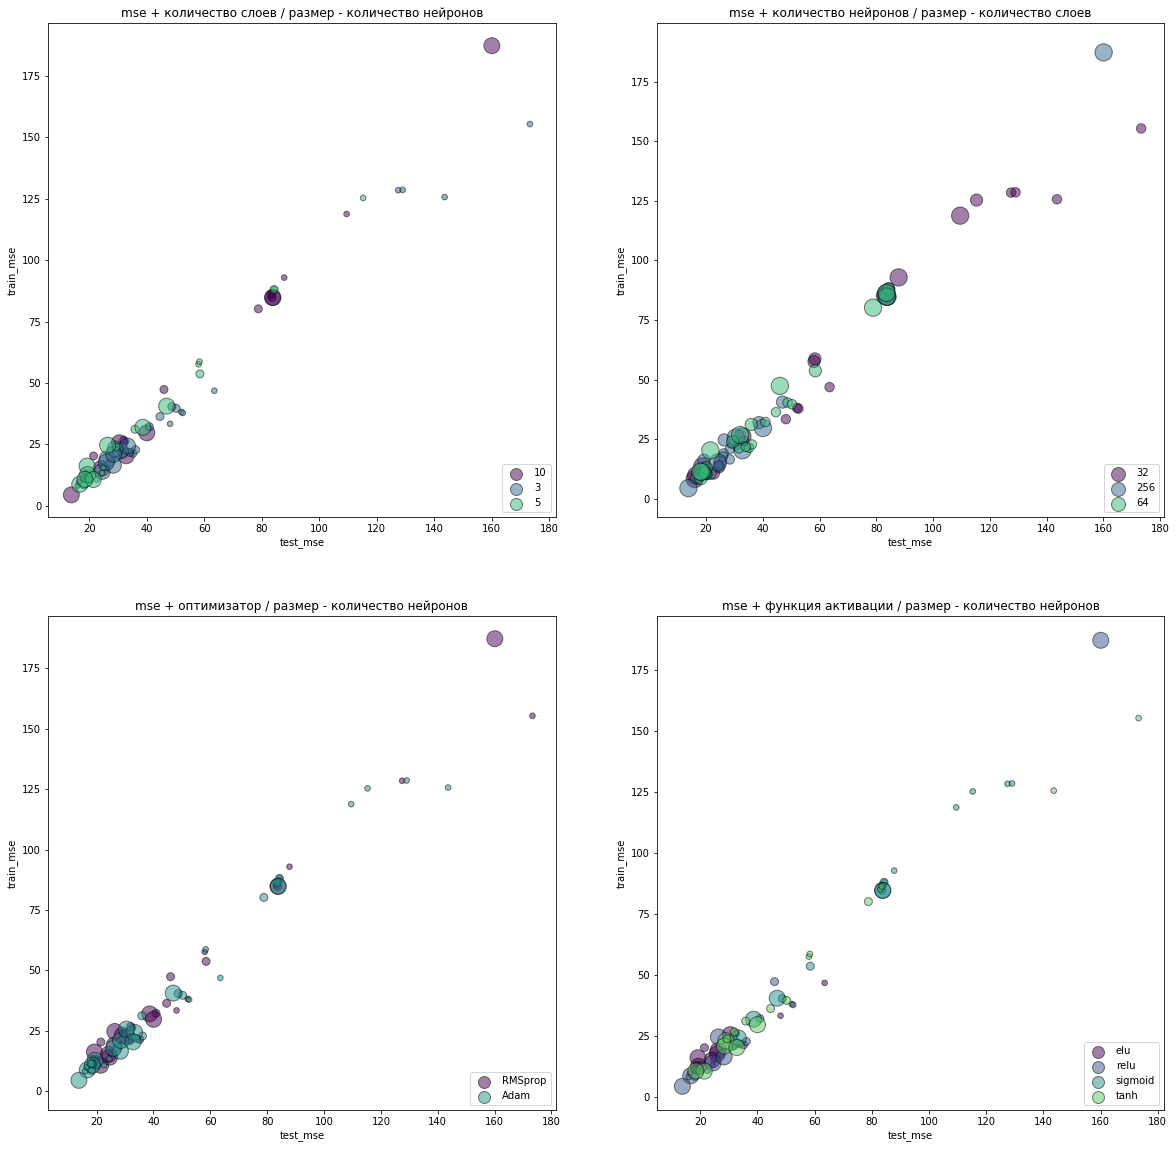

In [18]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(2, 2, 1)
ax.set_xlabel('test_mse')
ax.set_ylabel('train_mse')
ax.set_title('mse + количество слоев / размер - количество нейронов')
uniq = list(set(results['n_layers']))
z = range(1,len(uniq))
vir = plt.get_cmap('viridis')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=vir)
for i in range(len(uniq)):
    indx = results['n_layers'] == uniq[i]
    plt.scatter(results['test_mse'][indx], results['train_mse'][indx], 
                s=results['n_nums'][indx], color=scalarMap.to_rgba(i), label=uniq[i], alpha=0.5, edgecolors = 'black')
ax.legend(loc='lower right')

ax = fig.add_subplot(2, 2, 2)
ax.set_xlabel('test_mse')
ax.set_ylabel('train_mse')
ax.set_title('mse + количество нейронов / размер - количество слоев')
uniq = list(set(results['n_nums']))
z = range(1,len(uniq))
vir = plt.get_cmap('viridis')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=vir)
for i in range(len(uniq)):
    indx = results['n_nums'] == uniq[i]
    plt.scatter(results['test_mse'][indx], results['train_mse'][indx], 
                s=results['n_layers'][indx]*30, color=scalarMap.to_rgba(i), label=uniq[i], alpha=0.5, edgecolors = 'black')
ax.legend(loc='lower right')

ax = fig.add_subplot(2, 2, 3)
ax.set_xlabel('test_mse')
ax.set_ylabel('train_mse')
ax.set_title('mse + оптимизатор / размер - количество нейронов')
uniq = list(set(results['opt']))
z = range(1,len(uniq))
vir = plt.get_cmap('viridis')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=vir)
for i in range(len(uniq)):
    indx = results['opt'] == uniq[i]
    plt.scatter(results['test_mse'][indx], results['train_mse'][indx], 
                s=results['n_nums'][indx], color=scalarMap.to_rgba(i), label=uniq[i], alpha=0.5, edgecolors = 'black')
ax.legend(loc='lower right')

ax = fig.add_subplot(2, 2, 4)
ax.set_xlabel('test_mse')
ax.set_ylabel('train_mse')
ax.set_title('mse + функция активации / размер - количество нейронов')
uniq = list(set(results['act_func']))
z = range(1,len(uniq))
vir = plt.get_cmap('viridis')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=vir)
for i in range(len(uniq)):
    indx = results['act_func'] == uniq[i]
    plt.scatter(results['test_mse'][indx], results['train_mse'][indx], 
                s=results['n_nums'][indx], color=scalarMap.to_rgba(i), label=uniq[i], alpha=0.5, edgecolors = 'black')
ax.legend(loc='lower right')

plt.show()

Лучшее качество получилось на максимальном количестве слоев(10) и максимальном количестве нейронов(256). 
Наименьшая ошибка получилась с оптимизатором Adam. 
Наименьшая ошибка получилась при функции активации relu. На графике видно, что для задачи регрессии больше подходят функции relu и elu.

In [19]:
inputs = Input(shape=(13,))
x_1 = Flatten()(inputs)
x_2 = Dense(256, activation='relu')(x_1)
x_3 = Dense(256, activation='relu')(x_2)
x_4 = Dense(256, activation='relu')(x_3)
x_5 = Dense(256, activation='relu')(x_4)
x_6 = Dense(256, activation='relu')(x_5)
x_7 = Dense(256, activation='relu')(x_6)
x_8 = Dense(256, activation='relu')(x_7)
x_9 = Dense(256, activation='relu')(x_8)
outputs = Dense(1)(x_9)

model = Model(inputs, outputs)

model.compile(optimizer='Adam',
                    loss='mse',
                    metrics=['mse'])

model.summary()

history = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=5, 
                    validation_data=(X_test, y_test), 
                    verbose=1)

train_loss, train_m = model.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model.evaluate(X_test, y_test, verbose=2)

Model: "model_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_73 (InputLayer)        [(None, 13)]              0         
_________________________________________________________________
flatten_72 (Flatten)         (None, 13)                0         
_________________________________________________________________
dense_360 (Dense)            (None, 256)               3584      
_________________________________________________________________
dense_361 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_362 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_363 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_364 (Dense)            (None, 256)               657

In [20]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [21]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Коэффициент детерминации на тренировочной выборке: {round(r2_train,2)}')
print(f'Коэффициент детерминации на тестовой выборке: {round(r2_test,2)}')

Коэффициент детерминации на тренировочной выборке: 0.94
Коэффициент детерминации на тестовой выборке: 0.83


Коэффициент детерминации на тренировочной выборке: 0.95
Коэффициент детерминации на тестовой выборке: 0.84
Модель может считаться хорошей.
Попробуем поэкспериментировать.

In [22]:
results.sort_values(by=['overtr_diff'], ascending=True).head(30)

,n_layers,n_nums,act_func,opt,train_mse,test_mse,overtr_diff
64,10,256,relu,RMSprop,187.312195,160.083450,-27.228745
29,5,32,sigmoid,Adam,125.339752,115.307541,-10.032211
53,10,32,sigmoid,Adam,118.803284,109.544395,-9.258888
52,10,32,sigmoid,RMSprop,92.893120,87.858330,-5.034790
37,5,64,sigmoid,Adam,88.066643,84.305435,-3.761208
28,5,32,sigmoid,RMSprop,88.099678,84.387726,-3.711952
61,10,64,sigmoid,Adam,86.397774,83.590408,-2.807365
55,10,32,tanh,Adam,86.353630,83.548988,-2.804642
54,10,32,tanh,RMSprop,85.238487,83.035622,-2.202866
56,10,64,relu,RMSprop,47.354168,46.011009,-1.343159


In [23]:
inputs = Input(shape=(13,))
x_1 = Flatten()(inputs)
x_2 = Dense(256, activation='elu')(x_1)
x_3 = Dense(256, activation='elu')(x_2)
x_4 = Dense(256, activation='elu')(x_3)
outputs = Dense(1)(x_4)

model = Model(inputs, outputs)

model.compile(optimizer='RMSprop',
                    loss='mse',
                    metrics=['mse'])

model.summary()

history = model.fit(X_train, y_train, 
                    epochs=10, 
                    batch_size=5, 
                    validation_data=(X_test, y_test), 
                    verbose=1)

train_loss, train_m = model.evaluate(X_train, y_train, verbose=2)
test_loss, test_m = model.evaluate(X_test, y_test, verbose=2)

Model: "model_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_74 (InputLayer)        [(None, 13)]              0         
_________________________________________________________________
flatten_73 (Flatten)         (None, 13)                0         
_________________________________________________________________
dense_369 (Dense)            (None, 256)               3584      
_________________________________________________________________
dense_370 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_371 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_372 (Dense)            (None, 1)                 257       
Total params: 135,425
Trainable params: 135,425
Non-trainable params: 0
____________________________________________________

In [24]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Коэффициент детерминации на тренировочной выборке: {round(r2_train,2)}')
print(f'Коэффициент детерминации на тестовой выборке: {round(r2_test,2)}')

Коэффициент детерминации на тренировочной выборке: 0.82
Коэффициент детерминации на тестовой выборке: 0.78


Коэффициент детерминации на тренировочной выборке: 0.82
Коэффициент детерминации на тестовой выборке: 0.78
Переобучение и коэффициент детерминации снизились.